<a href="https://colab.research.google.com/github/adrianhi/Mall_Customers-cluster/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/Mydrive")

Mounted at /content/Mydrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Mydrive/MyDrive/Bootcamp AI/dt/Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.sample(n=15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
40,41,Female,65,38,35
183,184,Female,29,98,88
99,100,Male,20,61,49
123,124,Male,39,69,91
37,38,Female,30,34,73
148,149,Female,34,78,22
151,152,Male,39,78,88
124,125,Female,23,70,29
52,53,Female,31,43,54
28,29,Female,40,29,31


Mostraremos la relación entre la edad y el ingreso anual. Esto te permitirá ver si hay alguna tendencia o patrón discernible entre estas dos variables.

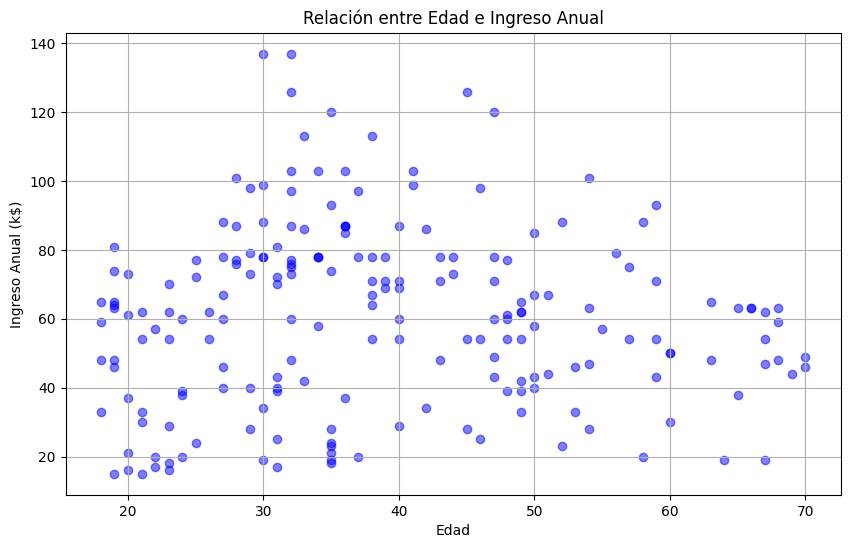

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], color='blue', alpha=0.5)
plt.title('Relación entre Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.grid(True)
plt.show()

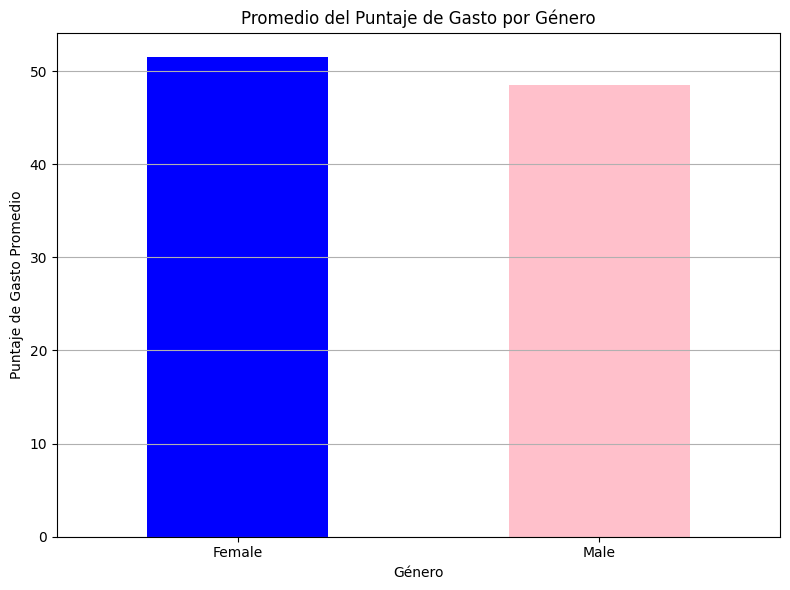

In [ ]:
avg_spending_by_gender = df.groupby('Gender')['Spending Score (1-100)'].mean()
plt.figure(figsize=(8, 6))
avg_spending_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Promedio del Puntaje de Gasto por Género')
plt.xlabel('Género')
plt.ylabel('Puntaje de Gasto Promedio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df_encoded=pd.get_dummies(df, columns=['Gender'])
df.duplicated().value_counts()

False    200
Name: count, dtype: int64

In [ ]:
datos = df[['Age', 'Annual Income (k$)']]
fig = px.area(datos, x='Age', y='Annual Income (k$)',
                    title='Gráfico 3D de Age, Annual Income y Spending Score')
fig.show()

In [ ]:
X = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

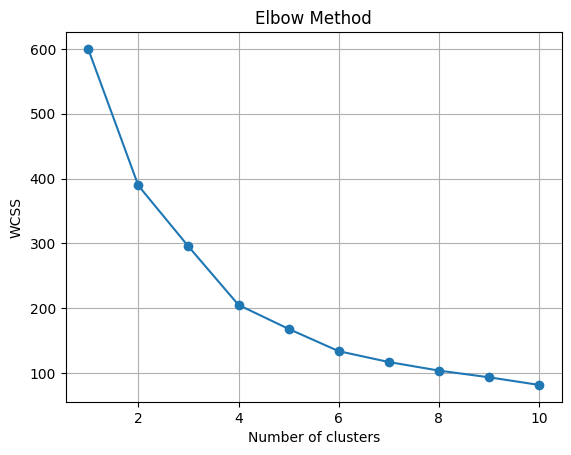

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar los resultados
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

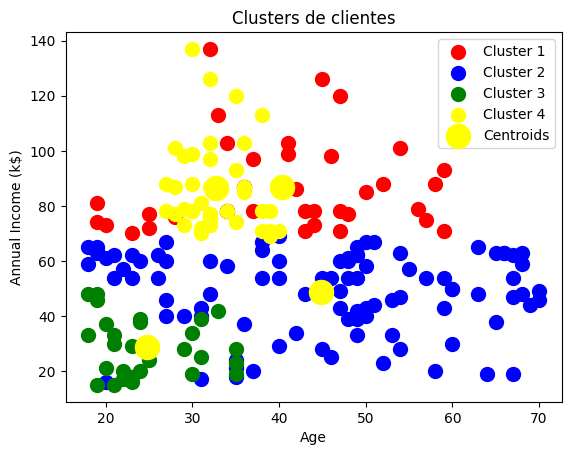

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualización de los clusters
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=100, c='yellow', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de clientes')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
print('kmeans inertia:',kmeans.inertia_)

kmeans inertia: 295.2122461555488


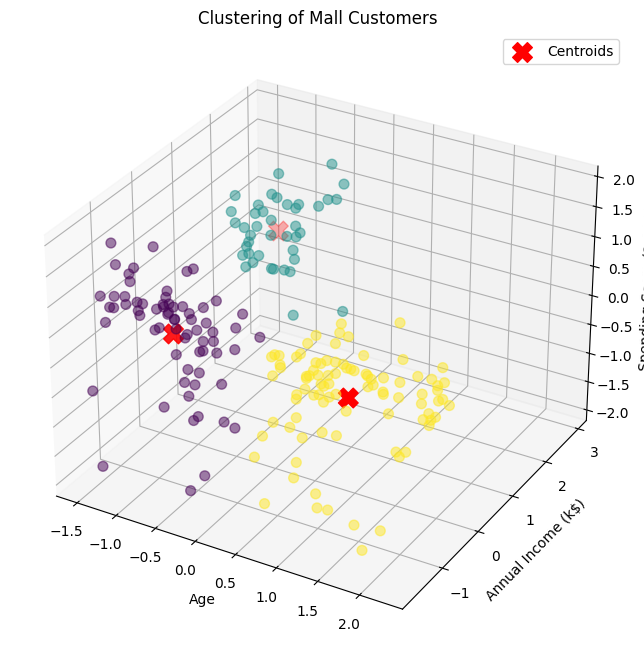

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=200, marker='X', label='Centroids')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Clustering of Mall Customers')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Crear y ajustar el modelo de clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

# Crear el gráfico tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos de datos
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)

# Dibujar los centroides de los clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', s=200, marker='X', label='Centroids')

# Etiquetas y título
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Clustering of Mall Customers')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
